## Observations and Insights 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [41]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique ())

249

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates =  study_data_complete['Mouse ID'].value_counts()
duplicates = pd.DataFrame(duplicates)
duplicates = duplicates.rename(columns={"Mouse ID":"Count of Mouse ID"})
duplicates.head()



,Count of Mouse ID
g989,13
y793,10
o926,10
a644,10
a203,10


In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseID=study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
# set the index to the mouse ID
duplicateMouseID=duplicateMouseID.set_index("Mouse ID")


# check the mouse data for ID
duplicateMouseID

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanstudy=study_data_complete[study_data_complete["Mouse ID"].isin(duplicateMouseID)==False]

cleanstudy.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [45]:
# Checking the number of mice in the clean DataFrame.

len(cleanstudy["Mouse ID"].unique())

249

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# series variable to hold Tumor Volume Data grouped by Drug Regimen
tumor_vol_grp = cleanstudy.groupby("Drug Regimen")

# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
tumor_vol_mean = tumor_vol_grp.mean()["Tumor Volume (mm3)"] 

# variable to hold median Tumor Volume Data Grouped by Drug Regimen
tumor_vol_median = tumor_vol_grp.median()["Tumor Volume (mm3)"] 

# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
tumor_vol_var = tumor_vol_grp.var()["Tumor Volume (mm3)"] 

# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
tumor_vol_std = tumor_vol_grp.std()["Tumor Volume (mm3)"] 

# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
tumor_vol_sem = tumor_vol_grp.sem()["Tumor Volume (mm3)"] 

# Convert to DataFrame
summaryTable = pd.DataFrame(    {"Mean Tumor Volume" : tumor_vol_mean
                                ,"Median Tumor Volume" : tumor_vol_median
                                ,"Tumor Volume Variance" : tumor_vol_var
                                ,"Tumor Volume Stdev" : tumor_vol_std
                                ,"Tumor Volume SEM" : tumor_vol_sem})
# Preview DataFrame
summaryTable





,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
summary_table = cleanstudy.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean","median","var","std","sem"]})
summary_table = summary_table.rename(columns={"mean":"Mean_Tumor_Volume"
                                             ,"median":"Median_Tumor_Volume"
                                             ,"var":"Variance_Tumor_Volume"
                                             ,"std":"Stdev_Tumor_Volume"
                                             ,"sem":"SEM_Tumor_Volume"})
summary_table


Tumor Volume (mm3)                                            \
              Mean_Tumor_Volume Median_Tumor_Volume Variance_Tumor_Volume   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.322552           50.854632             42.351070   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                  
             Stdev_Tumor_Volume SEM_Tumor_Volume  
Drug Regimen                                      
Capomulin              4.994774         0.329346  
Ceftamin               6.268188         0.469821  
Infubinol              6.567243         0.492236  
Ketapril               8.279709         0.603860  
Naftisol               8.134708         0.596466  
Placebo                7.821003         0.581331  
Propriva               6.507770         0.512884  
Ramicane               4.846308         0.320955  
Stelasyn               7.710419         0.573111  
Zoniferol              6.966589         0.516398

## Bar and Pie Charts

In [48]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# list of unique drug regimens
drug_regimens = cleanstudy["Drug Regimen"].unique()

# drug regimen as x-axis values for plotting

# drop all duplicate mice
dropped_dup_df = cleanstudy.drop_duplicates(subset="Mouse ID", keep='first')

# get mice counts per drug
mice_count_drug = dropped_dup_df["Drug Regimen"].value_counts()



dropped_dup_df




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


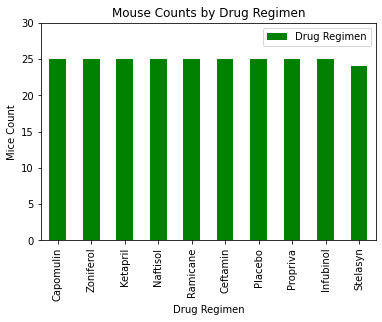

In [49]:
mice_count_drug.plot(kind="bar", color="green").legend(
    loc='upper right'
)
plt.ylabel("Mice Count")
plt.xlabel("Drug Regimen")
plt.title("Mouse Counts by Drug Regimen")
plt.ylim([0,30])
plt.show()


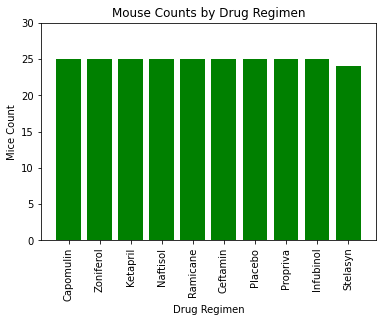

In [50]:
plt.bar(mice_count_drug.index.values,mice_count_drug.values, color="green")
plt.ylabel("Mice Count")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.title("Mouse Counts by Drug Regimen")
plt.ylim([0,30])
plt.show()

<AxesSubplot:title={'center':'Drug Regimen by Sex'}, ylabel='Sex'>

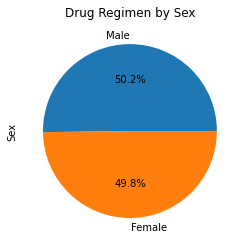

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count_drug = dropped_dup_df["Sex"].value_counts()
mice_count_drug.plot(kind="pie",autopct="%1.1f%%",title="Drug Regimen by Sex")

Text(0.5, 1.0, 'Drug Regimen by Sex')

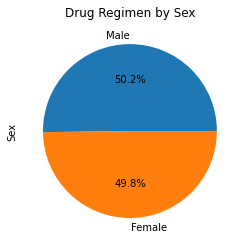

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_count_drug.values,labels=mice_count_drug.index.values,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Drug Regimen by Sex")

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
sub_df = cleanstudy.set_index("Drug Regimen")
sub_df = sub_df[(sub_df.index == "Capomulin") |
                    (sub_df.index == "Ramicane")  |
                    (sub_df.index == "Infubinol") |
                    (sub_df.index == "Ceftamin")]


# isolated view of just capomulin for later use
capomulin_df = sub_df[sub_df.index == "Capomulin"]


# Reset index so drug regimen column persists after inner merge


# get mouse count per drug
# Start by getting the last (greatest) timepoint for each mouse
lastTimepoint = sub_df.groupby("Mouse ID")["Timepoint"].max()
lastTimepoint = lastTimepoint.reset_index()
lastTimepoint.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [54]:
cleanMergedDF = lastTimepoint.merge(cleanstudy, on=["Mouse ID", "Timepoint"],how="left")
cleanMergedDF = cleanMergedDF.set_index("Mouse ID")
pd.set_option("display.max_rows", None)
cleanMergedDF

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a275,45,62.999356,3,Ceftamin,Female,20,28
a411,45,38.407618,1,Ramicane,Male,3,22
a444,45,43.047543,0,Ramicane,Female,10,25
a520,45,38.810366,1,Ramicane,Male,13,21
a577,30,57.031862,2,Infubinol,Female,6,25
a644,45,32.978522,1,Ramicane,Female,7,17
a685,45,66.083066,3,Infubinol,Male,8,30


In [55]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers
treatment_list = cleanMergedDF['Drug Regimen'].unique()
treatment_list = ['Capomulin','Ramicane','Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatment_list:
        final_tumor = cleanMergedDF.loc[cleanMergedDF['Drug Regimen'] == t, "Tumor Volume (mm3)"]
        tumor_vol_list.append(final_tumor)
        quartiles = final_tumor.quantile([0.25,0.5,0.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5 * iqr)
        upper_bound = upperq + (1.5 * iqr)
        outliers = final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]
#        print(f"{t} potential outliers:\n{outliers}\n")
        
# Locate the rows which contain mice on each drug and get the tumor volumes
temp_df = cleanMergedDF[["Drug Regimen","Tumor Volume (mm3)"]]
temp_df





,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a275,Ceftamin,62.999356
a411,Ramicane,38.407618
a444,Ramicane,43.047543
a520,Ramicane,38.810366
a577,Infubinol,57.031862
a644,Ramicane,32.978522
a685,Infubinol,66.083066


In [56]:
df1 = temp_df["Tumor Volume (mm3)"]
# print(df1)
quartiles = df1.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
median = quartiles[0.5]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
outliers = df1.loc[(df1 < lower_bound) | (df1 > upper_bound)]
print(f"The lower quartile of Tumor Volume is:{lowerq}")
print(f"The upper quartile of Tumor Volume is:{upperq}")
print(f"The interquartile range of Tumor Volume is:{iqr}")
print(f"The the median of Tumor Volume is:{median}")
print(f"Values below:{lower_bound} could be outliers")
print(f"Values above:{upper_bound} could be outliers")

The lower quartile of Tumor Volume is:37.1877438025
The upper quartile of Tumor Volume is:59.930261755
The interquartile range of Tumor Volume is:22.742517952499995
The the median of Tumor Volume is:45.0
Values below:3.0739668737500097 could be outliers
Values above:94.04403868374999 could be outliers


{'markerfacecolor': 'red', 'markersize': 10}

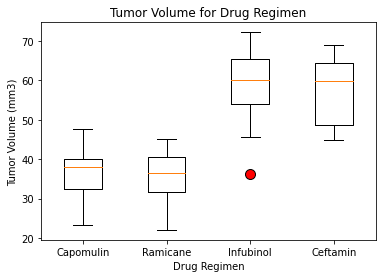

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplotout= dict(markerfacecolor="red", markersize=10)
plt.boxplot(tumor_vol_list,labels=treatment_list,flierprops=boxplotout)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume for Drug Regimen")


boxplotout

## Line and Scatter Plots

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

CapomulinTable = cleanstudy.loc[cleanstudy["Drug Regimen"]=="Capomulin"]

CapomulinTable.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


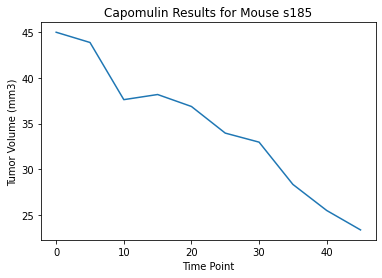

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#remove other mouse IDs so only s185 shows

#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
Mousedata = CapomulinTable.loc[CapomulinTable["Mouse ID"]=="s185"]


plt.plot(Mousedata["Timepoint"],Mousedata["Tumor Volume (mm3)"])
plt.title("Capomulin Results for Mouse s185")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

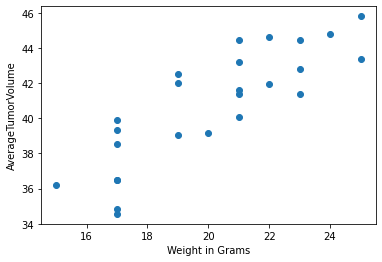

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

CapomulinAverage = CapomulinTable.groupby("Mouse ID").mean()

CapomulinAverage["Weight (g)"]
                 

plt.scatter(CapomulinAverage["Weight (g)"],CapomulinAverage["Tumor Volume (mm3)"])
plt.xlabel( "Weight in Grams")
plt.ylabel("AverageTumorVolume")
plt.show()

# group by mouse ID to find average tumor volume


# establish x-axis value for the weight of the mice


# produce scatter plot of the data

## Correlation and Regression

The correlation between both factors is0.84
LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134, intercept_stderr=2.590987686768349)


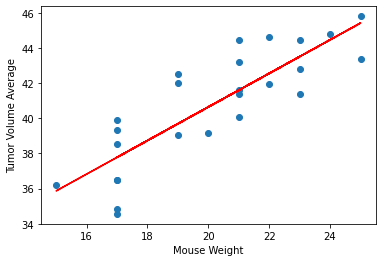

In [39]:
correlation =round(st.pearsonr(CapomulinAverage["Weight (g)"],CapomulinAverage["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between both factors is{correlation:.2f}")
# establish linear regression values
model= st.linregress(CapomulinAverage["Weight (g)"],CapomulinAverage["Tumor Volume (mm3)"])
print(model)

yValues=CapomulinAverage["Weight (g)"] * model[0] + model[1]

plt.scatter(CapomulinAverage["Weight (g)"],CapomulinAverage["Tumor Volume (mm3)"])
plt.xlabel( "Mouse Weight")
plt.ylabel("Tumor Volume Average")



# linear regression line 
plt.plot(CapomulinAverage["Weight (g)"], yValues, color="red")
plt.show()